### **Load Data**

In [1]:
import pandas as pd 

def load_data(file_path):
    df = pd.read_csv(file_path)

    return df 

file_path ='data/dataset.csv'

df = load_data(file_path)
df.head()

,Date,Store,Product,Value
0,20180101,LOS_ANGELES,TESLA_MODEL_X,2926.000
1,20180102,LOS_ANGELES,TESLA_MODEL_X,2687.531
2,20180103,LOS_ANGELES,TESLA_MODEL_X,2793.000
3,20180104,LOS_ANGELES,TESLA_MODEL_X,2394.000
4,20180105,LOS_ANGELES,TESLA_MODEL_X,2660.000


### **EDA**

In [2]:
# EDA 
def perform_eda(df):
    duplicates = df.duplicated().sum()
    missing_vlaues = df.isna().sum()
    data_info = df.info()

    print(f'Data Structures : {data_info}')
    print(f'\nDuplicates : {duplicates}')
    print(f'\nMissing Values : {missing_vlaues}')

perform_eda(df)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4320 entries, 0 to 4319
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     4320 non-null   int64  
 1   Store    4320 non-null   object 
 2   Product  4320 non-null   object 
 3   Value    4320 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 135.1+ KB
Data Structures : None

Duplicates : 0

Missing Values : Date       0
Store      0
Product    0
Value      0
dtype: int64


In [4]:
# Check statistics
statistics = df.describe().T
print('Summary Statistics')
statistics

Summary Statistics


,count,mean,std,min,25%,50%,75%,max
Date,4320.0,2.019052e+07,8133.852771,2.018010e+07,2.018093e+07,20190624.5,20200321.25,2.020122e+07
Value,4320.0,3.964446e+03,1447.632879,1.838532e+03,2.580927e+03,3997.1,5187.00,8.989514e+03


In [6]:
# Check unique values 
def check_unique_values(df):
    for column_name in df.columns:
        print(f'Unique values in {column_name} columns:')
        unique_values = df[column_name].unique()
        print(unique_values)
        print('--'*30)

check_unique_values(df)

Unique values in Date columns:
[20180101 20180102 20180103 ... 20201214 20201215 20201216]
------------------------------------------------------------
Unique values in Store columns:
['LOS_ANGELES' 'SAN_FRANCISCO']
------------------------------------------------------------
Unique values in Product columns:
['TESLA_MODEL_X' 'TESLA_MODEL_S']
------------------------------------------------------------
Unique values in Value columns:
[2926.       2687.531    2793.       ... 3045.01906  2443.132196
 2326.531596]
------------------------------------------------------------


### **Feature Engineering**

In [7]:
# Create dataframe for the LA store and Model X
df = df[(df['Store'] == 'LOS_ANGELES') & (df['Product'] == 'TESLA_MODEL_X')]
df.head()

,Date,Store,Product,Value
0,20180101,LOS_ANGELES,TESLA_MODEL_X,2926.000
1,20180102,LOS_ANGELES,TESLA_MODEL_X,2687.531
2,20180103,LOS_ANGELES,TESLA_MODEL_X,2793.000
3,20180104,LOS_ANGELES,TESLA_MODEL_X,2394.000
4,20180105,LOS_ANGELES,TESLA_MODEL_X,2660.000


In [8]:
# Create a ds column and format the Date column into datetime 
df['ds'] = pd.to_datetime(df['Date'], format='%Y%m%d')

# Check transformation 
df.head()

,Date,Store,Product,Value,ds
0,20180101,LOS_ANGELES,TESLA_MODEL_X,2926.000,2018-01-01
1,20180102,LOS_ANGELES,TESLA_MODEL_X,2687.531,2018-01-02
2,20180103,LOS_ANGELES,TESLA_MODEL_X,2793.000,2018-01-03
3,20180104,LOS_ANGELES,TESLA_MODEL_X,2394.000,2018-01-04
4,20180105,LOS_ANGELES,TESLA_MODEL_X,2660.000,2018-01-05


In [9]:
# Drop irrelevant columns
df = df.drop(['Date', 'Store', 'Product'], axis=1)

# Rename value to y 
df = df.rename(columns={'Value': 'y'})

# Check trtansformation
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


### **Data Visualization**

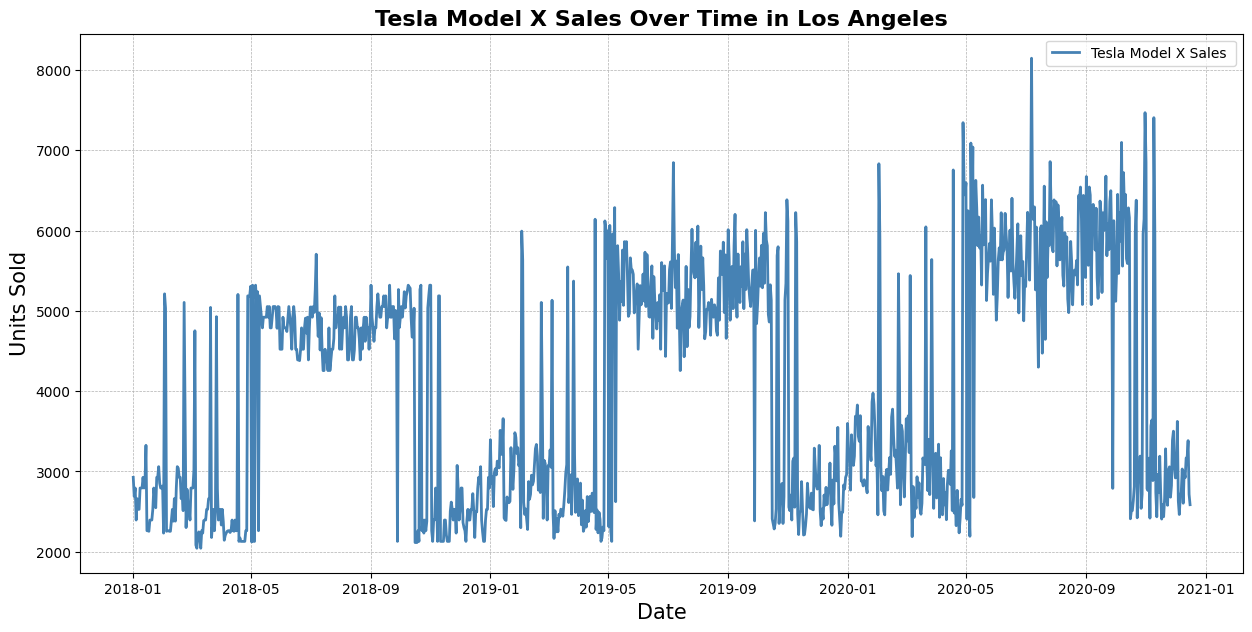

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize sales
plt.figure(figsize=(15, 7))
sns.lineplot(data=df,
             x='ds',
             y='y',
             lw=2,
             color='steelblue',
             label='Tesla Model X Sales ')


# Add titles and labels
plt.title('Tesla Model X Sales Over Time in Los Angeles', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Units Sold', fontsize=15)




# add grid 
plt.grid(visible=True,
         ls='--',
         lw='0.5')
plt.legend(loc='best')
plt.show()

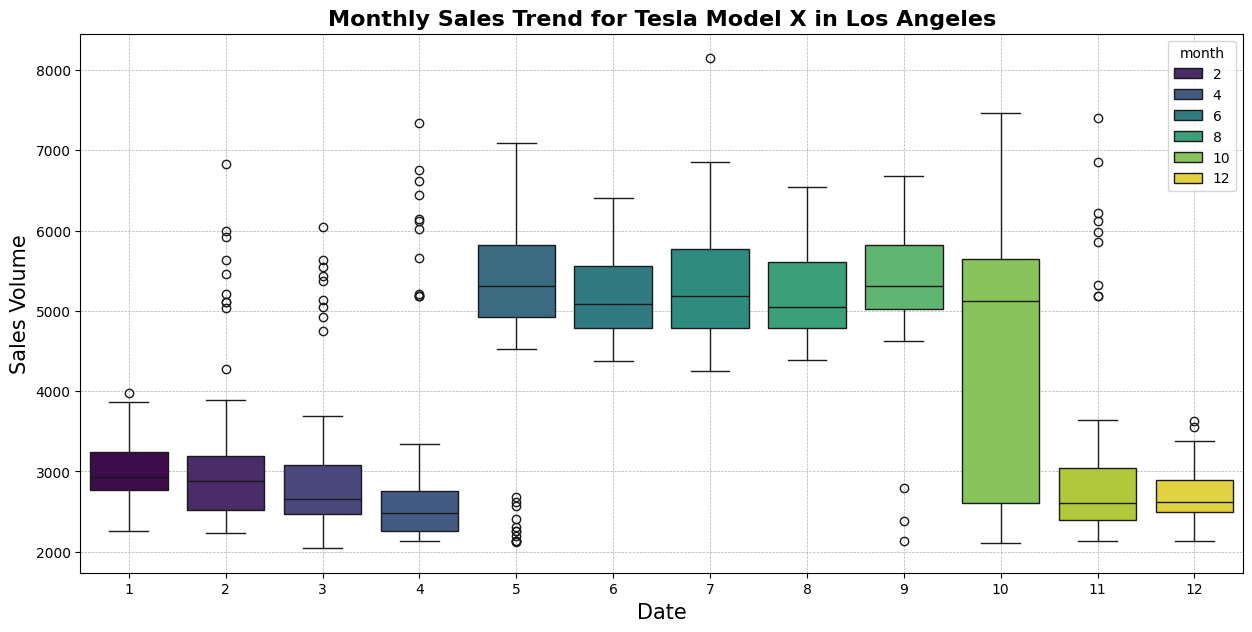

In [18]:
# Monthly sales trend 
plt.figure(figsize=(15, 7))
df['month'] = df['ds'].dt.month # Create month column and slice the ds column into months 
sns.boxplot(data=df,
            x='month',
            y='y',
            palette='viridis',
            hue='month')

# Add titles and labels
plt.title('Monthly Sales Trend for Tesla Model X in Los Angeles', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Sales Volume', fontsize=15)

# add grid 
plt.grid(visible=True,
         ls='--',
         lw='0.5')

plt.show()

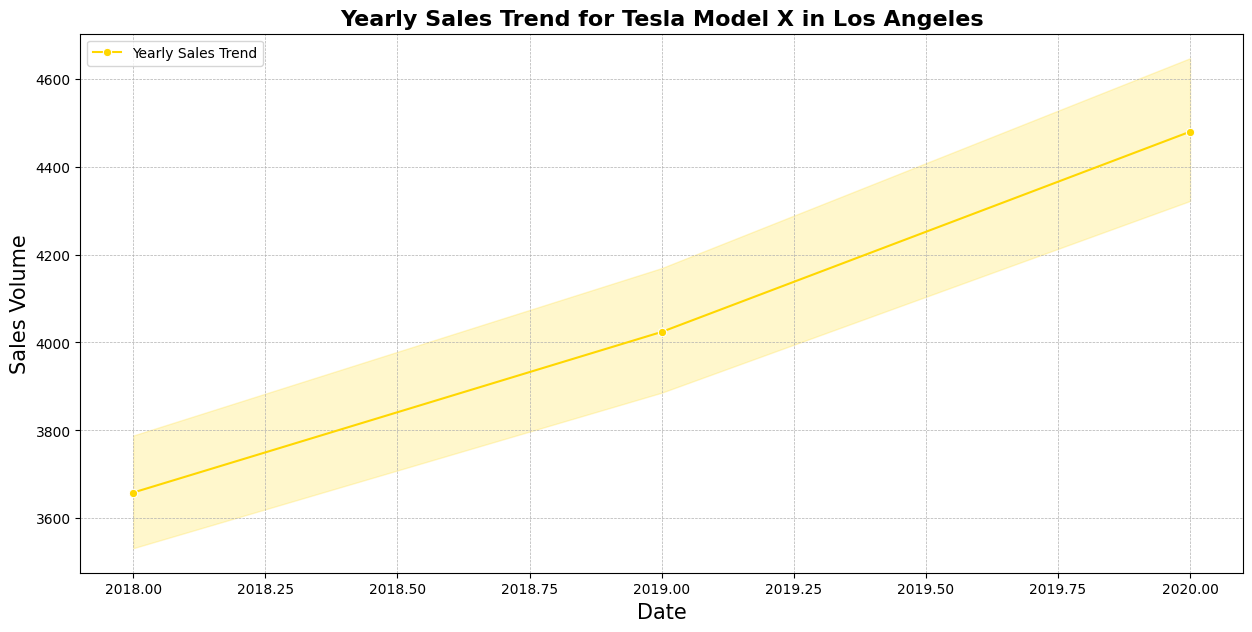

In [21]:
# Yearly sales trend 
plt.figure(figsize=(15, 7))
df['year'] = df['ds'].dt.year 
sns.lineplot(data=df,
            x='year',
            y='y',
            marker='o',
            color='gold',
            label='Yearly Sales Trend'
            )

# Add titles and labels
plt.title('Yearly Sales Trend for Tesla Model X in Los Angeles', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Sales Volume', fontsize=15)

# add grid 
plt.grid(visible=True,
         ls='--',
         lw='0.5')

plt.show()


### **Model Validation**

In [22]:
# Find the earliest data and the latest date 
earliest_date = df['ds'].min()
latest_date = df['ds'].max()

print(f'Earliest Date : {earliest_date}')
print(f'Latest Date : {latest_date}')

Earliest Date : 2018-01-01 00:00:00
Latest Date : 2020-12-16 00:00:00


In [28]:
# Split the dataset into train and test
train_size = int(len(df)* 0.80) # Cut off the data at 80%
train = df.iloc[:train_size]
test = df.iloc[train_size:]

# Return training split 
train_length = len(train)
test_length = len(test)
distribution = test_length / (train_length + test_length)

print(f'Train set proportion : {1- distribution:.2f}')
print(f'Test set proportion : {distribution:.2f}')


Train set proportion : 0.80
Test set proportion : 0.20


### **Machine learning**

In [30]:
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

# Initialize the model
m = Prophet()
model = m.fit(train)



21:18:29 - cmdstanpy - INFO - Chain [1] start processing
21:18:29 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
# Make predictions on the test set
yhat = m.predict(test[['ds']])
yhat.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-05-15,4283.356369,4705.369112,6725.579555,4283.356369,4283.356369,1448.308298,1448.308298,1448.308298,-33.046627,-33.046627,-33.046627,1481.354924,1481.354924,1481.354924,0.0,0.0,0.0,5731.664666
1,2020-05-16,4284.246991,4732.425507,6799.024971,4284.246991,4284.246991,1467.472814,1467.472814,1467.472814,-24.082589,-24.082589,-24.082589,1491.555403,1491.555403,1491.555403,0.0,0.0,0.0,5751.719805
2,2020-05-17,4285.137614,4824.015720,6839.794487,4285.137614,4285.137614,1551.122425,1551.122425,1551.122425,58.391041,58.391041,58.391041,1492.731383,1492.731383,1492.731383,0.0,0.0,0.0,5836.260038
3,2020-05-18,4286.028236,4727.830946,6852.936382,4286.028236,4286.028236,1510.937076,1510.937076,1510.937076,25.138885,25.138885,25.138885,1485.798192,1485.798192,1485.798192,0.0,0.0,0.0,5796.965313
4,2020-05-19,4286.918859,4664.735749,6807.738129,4286.918859,4286.918859,1465.518789,1465.518789,1465.518789,-6.247764,-6.247764,-6.247764,1471.766554,1471.766554,1471.766554,0.0,0.0,0.0,5752.437648


### **Evaluation**

In [38]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE and RMSE
def  evaluate_model(yhat):
    mae = mean_absolute_error(test['y'], yhat['yhat'])
    rmse =np.sqrt(mean_squared_error(test['y'], yhat['yhat']))
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

evaluate_model(yhat)

Mean Absolute Error (MAE): 628.51
Root Mean Squared Error (RMSE): 895.90


In [42]:
# Plot actual vs predicted sales
def plot_actual_vs_predicted(test, yhat, title=''):
    plt.figure(figsize=(15, 7))

    # Plot actual 
    plt.plot(test['ds'], test['y'], label='Actual', color= 'steelblue', lw=2)

    # Plot predicted
    plt.plot(test['ds'], yhat['yhat'], label='Predicted',color= 'orange', lw=2)

    # Plot the uncertainty intervals 
    plt.fill_between(yhat['ds'], yhat['yhat_lower'], yhat['yhat_upper'], color='gray', alpha=0.3)

    # Titles and labels 
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=15)
    plt.ylabel('Sales Volume', fontsize=15)
    plt.legend()
   

    # Grid
    plt.grid(visible=True, ls='--', lw=0.5)
    plt.tight_layout()
    plt.show()



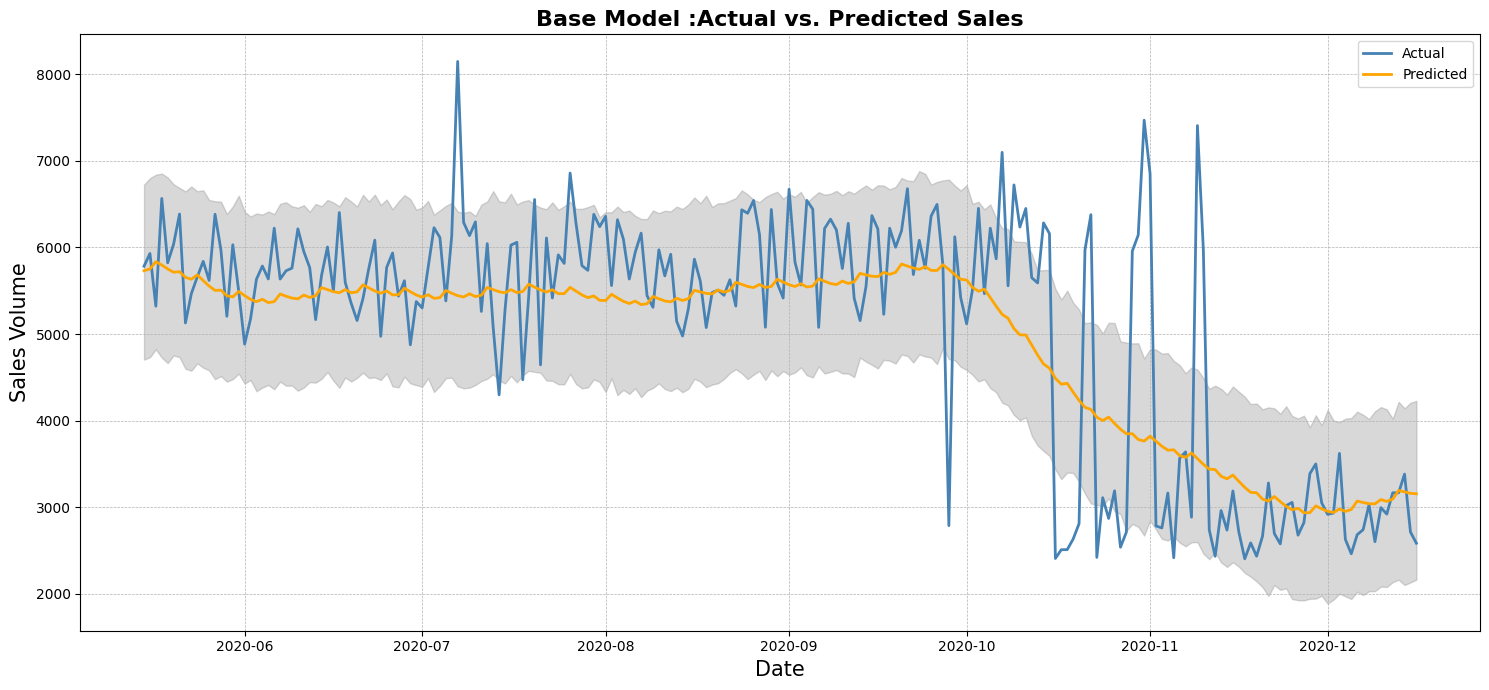

In [43]:
# Visualize the predictions
plot_actual_vs_predicted(test, yhat, title='Base Model :Actual vs. Predicted Sales')

### **Model Fine-Tuning**
- Create a loop similar to GridSearchCV to find the best combination of `n_changepoints` and `fourier_order`.

In [47]:
# Define ranges for n_changepoints and fourier_order
n_changepoints_range = [25,35 ,45 ,55 ,65 ,75]
fourier_order_range = [5, 10, 15, 20]

# Create empty list to store results
results = []

# Loop through n_changepoints_range and fourier_order_range
for n_changepoints in n_changepoints_range:
    for fourier_order in fourier_order_range:

        # Initialize the model
        # Fit the model with the current n_changepoints and fourier_order
        m_tuned = Prophet(n_changepoints=n_changepoints,
                          yearly_seasonality=True,
                          weekly_seasonality=True,
                          daily_seasonality=False,)
        
        # Add monthly seasonality with the current fourier_order
        m_tuned.add_seasonality(name='monthly', period=30.5, fourier_order=fourier_order)

        # Fit the model on the training data 
        m_tuned.fit(train)

        # Make predictions on the test data
        yhat = m_tuned.predict(test[['ds']])

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(test['y'], yhat['yhat']))

        # Append the results
        results.append({
            'n_changepoints': n_changepoints, 
            'fourier_order': fourier_order, 
            'rmse': rmse})

        

# Sort results by RMSE descending order 
sorted_results = sorted(results, key=lambda x: x['rmse'])

# Print sorted list of results 
print('\nSorted Combination of RMSE')
for res in sorted_results:
    print(f"n_changepoints: {res['n_changepoints']}, fourier_order: {res['fourier_order']}, RMSE: {res['rmse']:.2f}")
     

21:49:29 - cmdstanpy - INFO - Chain [1] start processing
21:49:29 - cmdstanpy - INFO - Chain [1] done processing
21:49:30 - cmdstanpy - INFO - Chain [1] start processing
21:49:30 - cmdstanpy - INFO - Chain [1] done processing
21:49:30 - cmdstanpy - INFO - Chain [1] start processing
21:49:30 - cmdstanpy - INFO - Chain [1] done processing
21:49:31 - cmdstanpy - INFO - Chain [1] start processing
21:49:31 - cmdstanpy - INFO - Chain [1] done processing
21:49:31 - cmdstanpy - INFO - Chain [1] start processing
21:49:31 - cmdstanpy - INFO - Chain [1] done processing
21:49:31 - cmdstanpy - INFO - Chain [1] start processing
21:49:31 - cmdstanpy - INFO - Chain [1] done processing
21:49:32 - cmdstanpy - INFO - Chain [1] start processing
21:49:32 - cmdstanpy - INFO - Chain [1] done processing
21:49:32 - cmdstanpy - INFO - Chain [1] start processing
21:49:32 - cmdstanpy - INFO - Chain [1] done processing
21:49:33 - cmdstanpy - INFO - Chain [1] start processing
21:49:33 - cmdstanpy - INFO - Chain [1]


Sorted Combination of RMSE
n_changepoints: 75, fourier_order: 10, RMSE: 871.05
n_changepoints: 45, fourier_order: 10, RMSE: 871.27
n_changepoints: 25, fourier_order: 10, RMSE: 871.81
n_changepoints: 35, fourier_order: 10, RMSE: 871.99
n_changepoints: 65, fourier_order: 10, RMSE: 872.91
n_changepoints: 55, fourier_order: 10, RMSE: 874.10
n_changepoints: 75, fourier_order: 15, RMSE: 877.12
n_changepoints: 25, fourier_order: 15, RMSE: 877.92
n_changepoints: 55, fourier_order: 15, RMSE: 878.41
n_changepoints: 75, fourier_order: 20, RMSE: 878.41
n_changepoints: 25, fourier_order: 20, RMSE: 879.98
n_changepoints: 65, fourier_order: 20, RMSE: 880.17
n_changepoints: 45, fourier_order: 20, RMSE: 880.24
n_changepoints: 65, fourier_order: 15, RMSE: 880.25
n_changepoints: 45, fourier_order: 15, RMSE: 880.26
n_changepoints: 35, fourier_order: 15, RMSE: 880.27
n_changepoints: 75, fourier_order: 5, RMSE: 880.80
n_changepoints: 65, fourier_order: 5, RMSE: 880.83
n_changepoints: 45, fourier_order: 5, 

In [48]:
# Instantiate the model with yearly and monthly seasonality adjustments 
m_tuned = Prophet(
        n_changepoints=n_changepoints,
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False,)

# Add monthly seasonality with the current fourier_order
m_tuned.add_seasonality(name='monthly', period=30.5, fourier_order=10)

# Fit the model on the training data 
m_tuned.fit(train)



21:54:51 - cmdstanpy - INFO - Chain [1] start processing
21:54:51 - cmdstanpy - INFO - Chain [1] done processing


In [51]:
# Make predictions on the test data
yhat_tuned = m_tuned.predict(test[['ds']])

# Evaluate the model
evaluate_model(yhat_tuned)

Mean Absolute Error (MAE): 627.55
Root Mean Squared Error (RMSE): 871.05


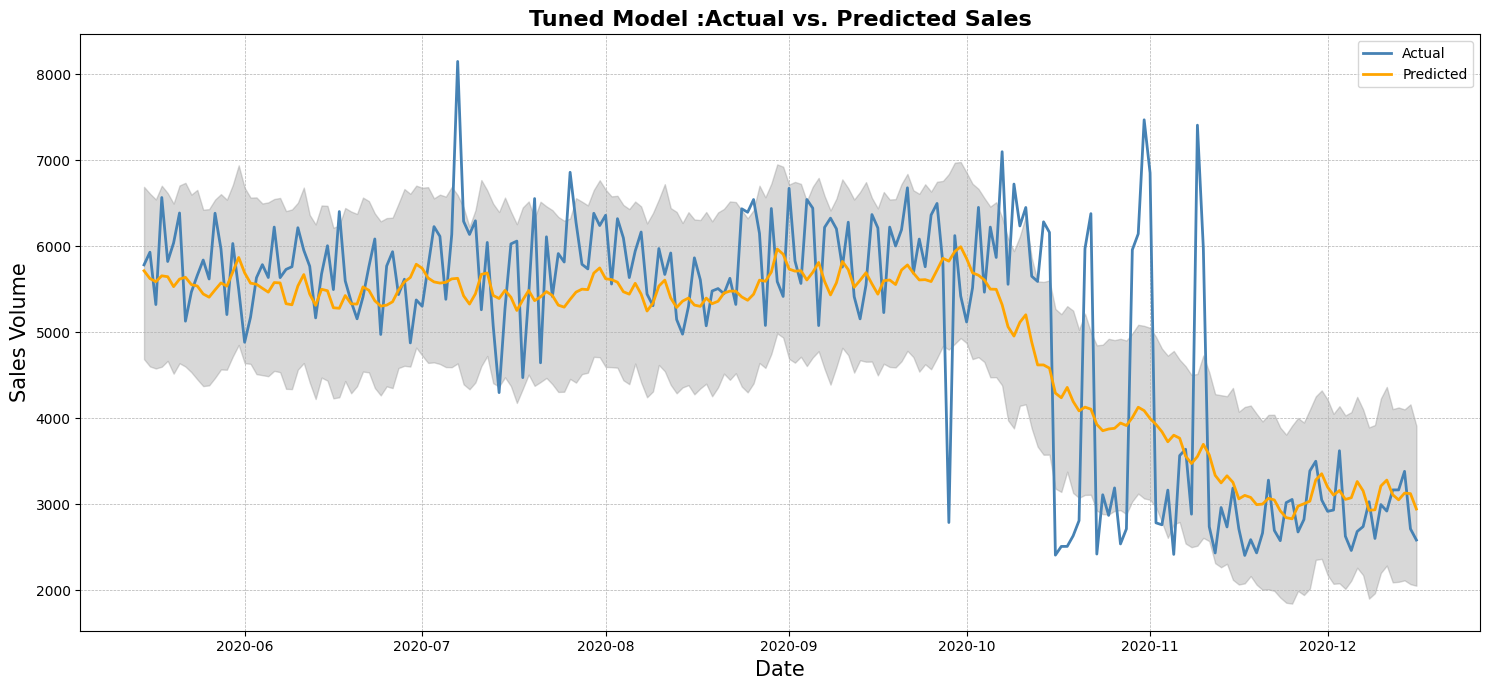

In [52]:
# Visualize the tuned model
plot_actual_vs_predicted(test, yhat_tuned, title='Tuned Model :Actual vs. Predicted Sales')